In [1]:
import IPython
%autosave 5

Autosaving every 5 seconds


In [2]:
import pandas as pd

In [3]:
pd.__version__

'2.2.3'

## Data Preparation

In [4]:
df = pd.read_csv("dataset.csv")
SizeDF = len(df)
SizeDF

7043

In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.gender.str.lower().str.replace(' ', '_')

0       female
1         male
2         male
3         male
4       female
         ...  
7038      male
7039    female
7040    female
7041      male
7042      male
Name: gender, Length: 7043, dtype: object

In [8]:
ColsValsToModify = list(df.dtypes[df.dtypes == 'object'].index)
for c in ColsValsToModify:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [9]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [10]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [11]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [12]:
TC = pd.to_numeric(df.totalcharges, errors="coerce")
TC

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [13]:
df[["customerid", "totalcharges"]][TC.isnull()]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [14]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = "coerce")

In [15]:
df.totalcharges = df.totalcharges.fillna(0)

In [16]:
df.totalcharges.dtypes

dtype('float64')

In [17]:
df.totalcharges.isnull().sum()

np.int64(0)

In [18]:
df.churn = (df.churn == 'yes').astype(int)

In [19]:
df[['totalcharges', 'churn']].head(8)

,totalcharges,churn
0,29.85,0
1,1889.50,0
2,108.15,1
3,1840.75,0
4,151.65,1
5,820.50,1
6,1949.40,0
7,301.90,0


In [20]:
df.head(5).T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [21]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

## Set up validation framework

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
FullTrainDF, TestDF = train_test_split(df, test_size=0.2, random_state=1)

In [24]:
len(FullTrainDF) + len(TestDF) == SizeDF

True

In [25]:
# the test_size is 0.25 here instead of 0.2 since 20% of the full dataset (df) is 25% of 80% of the dataset (FullTrainDF)
TrainDF, ValDF = train_test_split(FullTrainDF, test_size=0.25, random_state=1)  

In [26]:
len(TrainDF), len(ValDF), len(TestDF)

(4225, 1409, 1409)

In [27]:
len(TrainDF) + len(ValDF) + len(TestDF) == SizeDF

True

In [28]:
# since the indices were shuffled, you can either reset them to make it ordered or delete them as well, doesn't matter
TrainDF = TrainDF.reset_index(drop=True)
ValDF = ValDF.reset_index(drop=True)
TestDF = TestDF.reset_index(drop=True)

In [29]:
TrainDF.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0


In [30]:
# storing y values as numpy array values
yTrain = TrainDF.churn.values
yVal = ValDF.churn.values
yTest = TestDF.churn.values

# deleting y values from dataset
del TrainDF['churn']
del ValDF['churn']
del TestDF['churn']

In [31]:
# validating deletion of 'y value' column
"churn" in TrainDF, "churn" in ValDF, "churn" in TestDF

(False, False, False)

## EDA

In [32]:
FullTrainDF = FullTrainDF.reset_index(drop=True)

In [33]:
# checking for any null values in the dataset
FullTrainDF.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [34]:
# checking churn rate (i.e rate of counts of 1 in the datset)
GlobChurnRate = FullTrainDF['churn'].value_counts(normalize=True)[1]
# GlobChurnRate = FullTrainDF.churn.mean()
# can also be checked using mean of the value since it only returns number of 1s

In [35]:
print("Global churn rate:", round(GlobChurnRate, 2))

Global churn rate: 0.27


In [36]:
FullTrainDF.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [37]:
# numerical value columns
NumValues = ["tenure", "monthlycharges", "totalcharges"]

In [38]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [39]:
# categorical value columns
CategoricalValues = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [40]:
# no. of unique values in each categorical column
FullTrainDF[CategoricalValues].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature Importance

### Feature importance: Churn rate and risk ratio

In [41]:
# viewing churn rate for a particular variable
FullTrainDF[FullTrainDF.gender == 'female'].churn.mean()

np.float64(0.27682403433476394)

In [42]:
# viewing the churn rate, difference and ratio for gender column
GroupDFGender = FullTrainDF.groupby('gender').churn.agg(['mean', 'count'])
GroupDFGender['diff'] = GroupDFGender['mean'] - GlobChurnRate
GroupDFGender['ratio'] = GroupDFGender['mean'] / GlobChurnRate
GroupDFGender

,mean,count,diff,ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [43]:
from IPython.display import display

In [44]:
# viewing churn rate for all categorical variables
for c in CategoricalValues:
    print(c.title())
    GroupDF = FullTrainDF.groupby(c).churn.agg(['mean', 'count'])
    GroupDF['diff'] = GroupDF['mean'] - GlobChurnRate
    GroupDF['ratio'] = GroupDF['mean'] / GlobChurnRate
    display(GroupDF)
    print(); print()

Gender


,mean,count,diff,ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




Seniorcitizen


,mean,count,diff,ratio
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




Partner


,mean,count,diff,ratio
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




Dependents


,mean,count,diff,ratio
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




Phoneservice


,mean,count,diff,ratio
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




Multiplelines


,mean,count,diff,ratio
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




Internetservice


,mean,count,diff,ratio
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




Onlinesecurity


,mean,count,diff,ratio
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




Onlinebackup


,mean,count,diff,ratio
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




Deviceprotection


,mean,count,diff,ratio
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




Techsupport


,mean,count,diff,ratio
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




Streamingtv


,mean,count,diff,ratio
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




Streamingmovies


,mean,count,diff,ratio
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




Contract


,mean,count,diff,ratio
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




Paperlessbilling


,mean,count,diff,ratio
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




Paymentmethod


,mean,count,diff,ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### Feature importance: Mutual importance
Mutual importance tells us how much we can learn about one variable if we know the value of another variable

In [45]:
from sklearn.metrics import mutual_info_score

In [46]:
print(CategoricalValues)

['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


In [47]:
mutual_info_score(FullTrainDF.dependents, FullTrainDF.churn)

np.float64(0.012345815445534689)

In [48]:
# function to apply mutual_info_score to all categorical values in the dataset
def MIS(cols: pd.Series) -> float:
    return mutual_info_score(cols, FullTrainDF.churn)

In [49]:
# view the mutual_info_score for all the columns
FullTrainDF[CategoricalValues].apply(MIS).sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Feature importance: Correlation
How numerical variable affect our churn variable

In [50]:
# looking at correlational values
# -ve values correspond to -ve correlation and vice-versa
'''
0 to 0.2 - rarely correlated
0.2 to 0.5 - moderately "
0.5 - 1 - mostly "
'''

FullTrainDF[NumValues].corrwith(FullTrainDF.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [51]:
FullTrainDF['tenure'].max()

np.int64(72)

In [52]:
a = FullTrainDF[FullTrainDF['tenure'] <= 2].churn.mean()
b = FullTrainDF[(FullTrainDF.tenure > 2) & (FullTrainDF.tenure <= 12)].churn.mean()
c = FullTrainDF[FullTrainDF['tenure'] > 12].churn.mean()
Duration = ["<2 months", "2 - 12", ">12 months"]
Values = [a, b, c]

In [53]:
import matplotlib.pyplot as plt

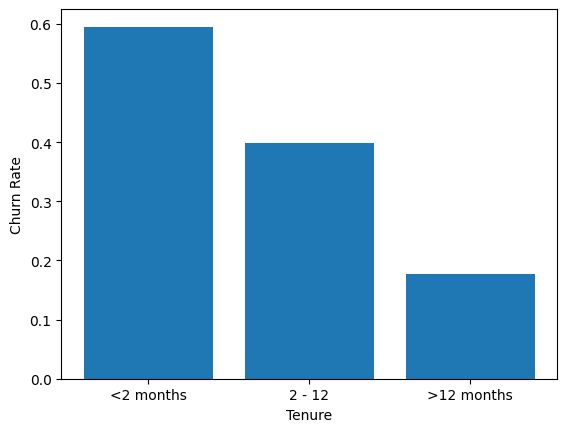

In [54]:
fig, ax = plt.subplots()
ax.bar(Duration, Values)
ax.set_xlabel("Tenure")
ax.set_ylabel("Churn Rate")
plt.show()

## One-Hot Encoding

In [55]:
from sklearn.feature_extraction import DictVectorizer

In [56]:
dv = DictVectorizer(sparse=False)

### Practice

In [57]:
CategoricalValues

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [58]:
_dicts = FullTrainDF[["gender", "contract", "paymentmethod"]].iloc[:50].to_dict(orient = 'records')

In [59]:
_dicts[0]

{'gender': 'male', 'contract': 'two_year', 'paymentmethod': 'mailed_check'}

In [60]:
dv.fit(_dicts)

DictVectorizer(sparse=False)

In [61]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check']

In [62]:
dv.transform(_dicts)

array([[0., 0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0.],
       [1.

### Fit

In [63]:
TrainDicts = TrainDF[CategoricalValues + NumValues].to_dict(orient = 'records')

In [64]:
X_train = dv.fit_transform(TrainDicts)

In [65]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [66]:
ValDicts = ValDF[CategoricalValues + NumValues].to_dict(orient = 'records')

In [67]:
X_val = dv.transform(ValDicts)

## Logistic Regression

In [68]:
import numpy as np
np.set_printoptions(legacy = '1.25')

### Mathematical logic behind logistic regression

In [69]:
def sigmoid(z: np.array) -> np.array:
    return 1 / (1 + np.exp(-z))

In [70]:
z = np.linspace(-7, 7, 41)
z

array([-7.  , -6.65, -6.3 , -5.95, -5.6 , -5.25, -4.9 , -4.55, -4.2 ,
       -3.85, -3.5 , -3.15, -2.8 , -2.45, -2.1 , -1.75, -1.4 , -1.05,
       -0.7 , -0.35,  0.  ,  0.35,  0.7 ,  1.05,  1.4 ,  1.75,  2.1 ,
        2.45,  2.8 ,  3.15,  3.5 ,  3.85,  4.2 ,  4.55,  4.9 ,  5.25,
        5.6 ,  5.95,  6.3 ,  6.65,  7.  ])

In [71]:
sigmoid(z)

array([9.11051194e-04, 1.29234978e-03, 1.83293894e-03, 2.59906776e-03,
       3.68423990e-03, 5.22012569e-03, 7.39154134e-03, 1.04567062e-02,
       1.47740317e-02, 2.08363445e-02, 2.93122308e-02, 4.10912782e-02,
       5.73241759e-02, 7.94385492e-02, 1.09096821e-01, 1.48047198e-01,
       1.97816111e-01, 2.59225101e-01, 3.31812228e-01, 4.13382421e-01,
       5.00000000e-01, 5.86617579e-01, 6.68187772e-01, 7.40774899e-01,
       8.02183889e-01, 8.51952802e-01, 8.90903179e-01, 9.20561451e-01,
       9.42675824e-01, 9.58908722e-01, 9.70687769e-01, 9.79163655e-01,
       9.85225968e-01, 9.89543294e-01, 9.92608459e-01, 9.94779874e-01,
       9.96315760e-01, 9.97400932e-01, 9.98167061e-01, 9.98707650e-01,
       9.99088949e-01])

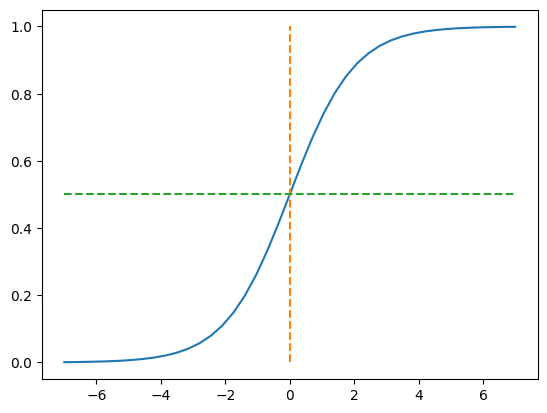

In [72]:
plt.plot(z, sigmoid(z))
plt.plot(np.array([0, 0, 0]), np.array([0, 0.5, 1]), linestyle = 'dashed')
plt.plot(np.array([-7, 0, 7]), np.array([0.5, 0.5, 0.5]), linestyle = 'dashed')

plt.show()

## Training

In [73]:
from sklearn.linear_model import LogisticRegression  

In [74]:
model = LogisticRegression(max_iter=3000)

In [75]:
# fitting the one-hot encoded input data and target variables
classifier = model.fit(X_train, yTrain)

In [76]:
model.intercept_

array([-0.04651832])

In [77]:
print(model.coef_[0].round(3))

[ 0.685  0.034 -0.679  0.055 -0.015  0.113 -0.16   0.086  0.039  0.001
 -0.497  0.696 -0.16  -0.018 -0.188  0.067  0.16   0.116 -0.16   0.083
  0.284 -0.16  -0.085 -0.162  0.202 -0.044  0.084 -0.053 -0.002  0.106
 -0.012  0.067 -0.028  0.194 -0.094 -0.16   0.294 -0.054 -0.16   0.254
  0.234 -0.16  -0.035 -0.068  0.   ]


In [103]:
yPred = model.predict_proba(X_val)[:, 1]
yPred

array([0.00666514, 0.20482682, 0.21758284, ..., 0.15170331, 0.78885712,
       0.81175089])

In [104]:
Decision = yPred >= 0.5
Decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [105]:
yVal

array([0, 0, 0, ..., 0, 1, 1])

In [107]:
PredDF = pd.DataFrame()
PredDF['probability'] = PredProb
PredDF['actual'] = yVal
PredDF['predicted'] = Decision.astype(int)
PredDF['acc'] = yVal == Decision.astype(int)
PredDF[::50]

,probability,actual,predicted,acc
0,0.006665,0,0,True
50,0.500978,0,1,False
100,0.005743,0,0,True
150,0.031078,0,0,True
200,0.162014,0,0,True
250,0.310790,1,0,False
300,0.545729,1,1,True
350,0.006005,0,0,True
400,0.279914,0,0,True
450,0.107265,0,0,True


In [108]:
print(f"Accuracy: {PredDF.acc.mean().round(5)*100}%")

Accuracy: 80.341%


## Accuracy and Dummy model

In [109]:
Thres = np.linspace(0, 1, 21)
Thres

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [110]:
a =list()
for i in Thres:
    Dec = PredProb >= i
    Dec.astype(int)
    a.append((yVal == Dec).mean())

In [111]:
ThresTable = pd.DataFrame()
ThresTable['threshold'] = Thres
ThresTable['accuracy'] = a
ThresTable.sort_values("accuracy", ascending=False)

,threshold,accuracy
10,0.50,0.803407
11,0.55,0.801987
12,0.60,0.795600
9,0.45,0.791341
13,0.65,0.788502
8,0.40,0.782115
14,0.70,0.765791
7,0.35,0.764372
6,0.30,0.757984
15,0.75,0.742370


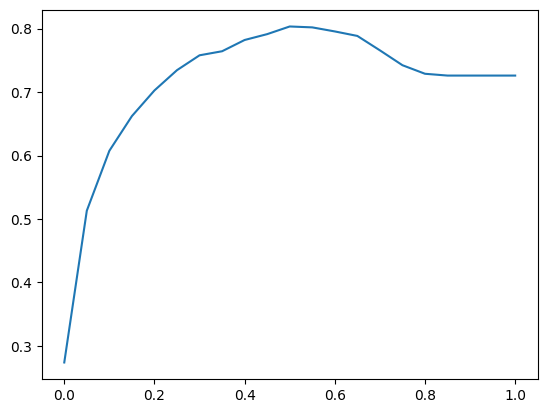

In [112]:
plt.plot(Thres, a)

## Confusion Matrix

In [116]:
thres = 0.5

ActualPos = (yVal == 1)
ActualNeg = (yVal == 0)
PredPos = (yPred >= thres)
PredNeg = (yPred < thres)

In [117]:
TruePos = (ActualPos & PredPos)
TrueNeg = (ActualNeg & PredNeg)
FalsePos = (ActualNeg & PredPos)
FalseNeg = (ActualPos & PredNeg)
tp = TruePos.sum()
tn = TrueNeg.sum()
fp = FalsePos.sum()
fn = FalseNeg.sum()

In [118]:
t = np.array([tp, fp, tn, fn])
t

array([212, 103, 920, 174])

In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [124]:
ConMat = confusion_matrix(yVal, Decision.astype(int))
ConMat

array([[920, 103],
       [174, 212]])

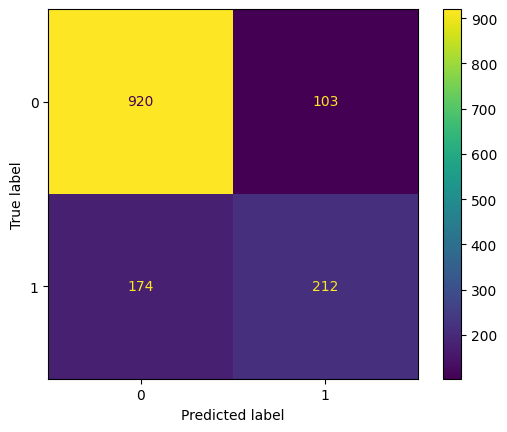

In [125]:
ConMat_disp = ConfusionMatrixDisplay(confusion_matrix = ConMat)
ConMat_disp.plot()
plt.show()

## Precision and Recall

### Precision
It can be defined as the ratio of true positive to the sum of true positive and false positive.
It provides us with the knowledge of how many correct (percentage) predictions we have made

In [126]:
from sklearn.metrics import precision_score

In [131]:
precision_score(yVal, (yPred >= 0.5))

0.6730158730158731

In [132]:
def PrecScore(tp: int, fp: int) -> float:
    return tp/(tp+fp)

In [133]:
PrecScore(tp, fp)

0.6730158730158731

### Recall
It can be defined as the ratio of true positive to the sum of true positive and false negative. It is the ability of a classifier to correctly identify positive examples

In [134]:
from sklearn.metrics import recall_score

In [135]:
recall_score(yVal, (yPred >= 0.5))

0.5492227979274611

In [136]:
def RecScore(tp: int, fn: int) -> float:
    return tp/(tp+fn)

In [137]:
RecScore(tp, fn)

0.5492227979274611

In [138]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

In [139]:
p, r, _ = precision_recall_curve(yVal, (yPred >= 0.5))

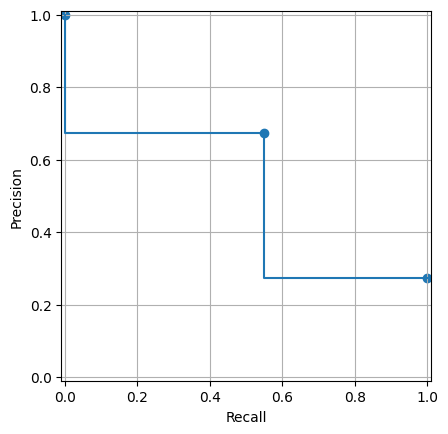

In [140]:
disp = PrecisionRecallDisplay(precision=p, recall=r)
disp.plot()
plt.scatter(r, p)
plt.grid()
plt.show()

## ROC Curves

### TPR and FPR
We would like to maximize TPR and minimize FPR

In [143]:
scores = list()

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    ActualPos = (yVal == 1)
    ActualNeg = (yVal == 0)
    PredPos = (yPred >= t)
    PredNeg = (yPred < t)

    tp = (PredPos & ActualPos).sum()
    tn = (PredNeg & ActualNeg).sum()
    fp = (PredPos & ActualNeg).sum()
    fn = (PredNeg & ActualPos).sum()

    scores.append((t, tp, fp, fn, tn))

In [144]:
scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 895, 1, 128),
 (0.02, 383, 804, 3, 219),
 (0.03, 382, 750, 4, 273),
 (0.04, 382, 709, 4, 314),
 (0.05, 378, 678, 8, 345),
 (0.06, 377, 653, 9, 370),
 (0.07, 374, 624, 12, 399),
 (0.08, 371, 588, 15, 435),
 (0.09, 370, 557, 16, 466),
 (0.1, 366, 533, 20, 490),
 (0.11, 365, 511, 21, 512),
 (0.12, 361, 497, 25, 526),
 (0.13, 360, 482, 26, 541),
 (0.14, 358, 462, 28, 561),
 (0.15, 353, 443, 33, 580),
 (0.16, 350, 431, 36, 592),
 (0.17, 349, 413, 37, 610),
 (0.18, 347, 400, 39, 623),
 (0.19, 345, 379, 41, 644),
 (0.2, 339, 372, 47, 651),
 (0.21, 335, 355, 51, 668),
 (0.22, 327, 334, 59, 689),
 (0.23, 323, 320, 63, 703),
 (0.24, 319, 309, 67, 714),
 (0.25, 314, 302, 72, 721),
 (0.26, 313, 288, 73, 735),
 (0.27, 308, 277, 78, 746),
 (0.28, 303, 266, 83, 757),
 (0.29, 298, 251, 88, 772),
 (0.3, 292, 247, 94, 776),
 (0.31, 288, 241, 98, 782),
 (0.32, 283, 235, 103, 788),
 (0.33, 277, 226, 109, 797),
 (0.34, 275, 222, 111, 801),
 (0.35000000000000003, 272, 2

In [145]:
Cols = ['threshold', 'tp', 'fp', 'fn', 'tn']
DataScores = pd.DataFrame(scores, columns=Cols)
DataScores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,533,20,490
20,0.2,339,372,47,651
30,0.3,292,247,94,776
40,0.4,254,175,132,848
50,0.5,212,103,174,920
60,0.6,151,53,235,970
70,0.7,69,13,317,1010
80,0.8,4,0,382,1023
90,0.9,0,0,386,1023


In [146]:
DataScores['tpr'] = DataScores.tp/(DataScores.tp + DataScores.fn)
DataScores['fpr'] = DataScores.fp/(DataScores.fp + DataScores.tn)

In [147]:
DataScores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,533,20,490,0.948187,0.521017
20,0.2,339,372,47,651,0.878238,0.363636
30,0.3,292,247,94,776,0.756477,0.241447
40,0.4,254,175,132,848,0.658031,0.171065
50,0.5,212,103,174,920,0.549223,0.100684
60,0.6,151,53,235,970,0.391192,0.051808
70,0.7,69,13,317,1010,0.178756,0.012708
80,0.8,4,0,382,1023,0.010363,0.000000
90,0.9,0,0,386,1023,0.000000,0.000000


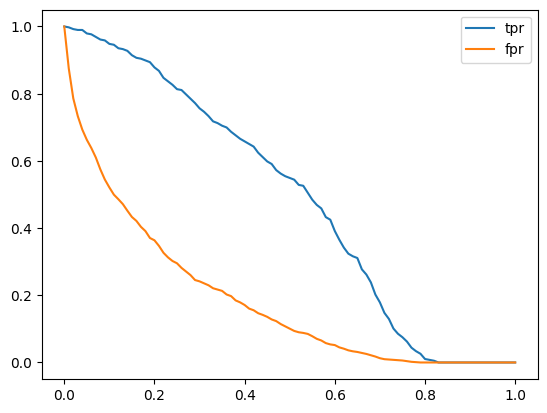

In [148]:
plt.plot(DataScores.threshold, DataScores.tpr, label = "tpr")
plt.plot(DataScores.threshold, DataScores.fpr, label = "fpr")
plt.legend()
plt.show()

In [149]:
NoNeg = (yVal == 0).sum()
NoPos = (yVal == 1).sum()
NoNeg, NoPos

(1023, 386)

In [154]:
y_ideal = np.repeat([0, 1], [1023, 386])
y_ideal_pred = np.linspace(0, 1, len(yVal))

In [159]:
((y_ideal_pred >= 0.72) == y_ideal).mean()

0.99361249112846

In [170]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
fpr, tpr, thres = roc_curve(yVal, yPred)
rcd_auc = auc(fpr, tpr)

In [171]:
rcd_disp = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = rcd_auc)

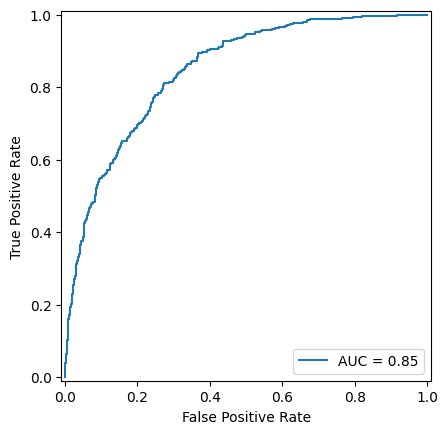

In [172]:
rcd_disp.plot()